In [50]:
import pandas as pd
import pprint as pp

In [51]:
from inc import stop_words as sw
from inc import extra_stopwords as esw

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [53]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [55]:
from inc import stop_words as sw
from inc import extra_stopwords as esw
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.common_stopwords)
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.extra_stopwords)

In [57]:
model = make_pipeline(TfidfVectorizer(stop_words=sw.STOP_WORDS), MultinomialNB())

In [58]:
from sqlalchemy import create_engine
table_name = 'Training_set'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [59]:
df = pd.read_sql_table(table_name, engine)

2020-12-17 01:40:04,370 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-17 01:40:04,371 INFO sqlalchemy.engine.base.Engine ()
2020-12-17 01:40:04,372 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-17 01:40:04,373 INFO sqlalchemy.engine.base.Engine ()
2020-12-17 01:40:04,374 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-17 01:40:04,375 INFO sqlalchemy.engine.base.Engine ()
2020-12-17 01:40:04,377 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-12-17 01:40:04,378 INFO sqlalchemy.engine.base.Engine ()
2020-12-17 01:40:04,379 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("Training_set")
2020-12-17 01:40:04,380 INFO sqlalchemy.engine.base.Engine ()
2020-12-17 01:40:04,382 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNI

In [60]:
df = df.rename(columns={"class": "label"})

In [61]:
df = df.sample(frac=1).reset_index(drop=True) # randomize

In [62]:
train = df.sample(frac=0.8,random_state=200) #random state is a seed value
test = df.drop(train.index)

In [63]:
model.fit(train.abstract, train.label)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words={'aderton', 'adertonde', 'adjö',
                                             'aldrig', 'allas', 'allt',
                                             'alltid', 'alltså', 'andra',
                                             'andras', 'annan', 'annat',
                                             'ansökan', 'arton', 'artonde',
                                             'att', 'av', 'avhandling',
                                             'bakgrund', 'bakom', 'bara',
                                             'behöva', 'behövas', 'behövde',
                                             'behövt', 'beslut', 'beslutat',
                                             'beslutit', 'bland', 'blev', ...})),
                ('multinomialnb', MultinomialNB())])

In [64]:
labels = model.predict(test.abstract)

In [65]:
pp.pprint(labels)

array([ 9, 15, 17,  9, 17, 17, 11, 14, 16, 11,  9, 10, 15,  9,  8, 13, 10,
        8, 11, 15, 10, 15, 15, 10,  9,  6,  9, 13,  9, 11,  7, 13,  8,  8,
       17,  7, 11,  7,  3,  9,  8,  9,  2,  9,  9, 13, 16, 11, 13,  2,  9,
       13, 14,  9, 16,  2, 11, 15,  9,  9, 13,  8, 14, 12, 17, 11,  9, 10,
        9,  8,  2, 11,  9, 17,  7, 15, 14, 16, 14, 16, 16,  9,  9,  9, 17,
        8, 12,  8, 14,  2, 16,  9,  3, 17,  2, 14, 13, 10, 12, 13, 10,  9,
       11, 12,  9,  2,  7,  9,  9, 11, 12, 10, 15, 15, 16, 12, 13, 16, 10,
       10, 10,  3,  6,  8,  9,  2, 15, 15,  8, 11,  2,  9, 12, 14, 10, 14,
       16,  9, 11, 10,  8, 15,  9, 15,  7,  8, 16, 14, 11, 13,  9,  8,  9,
       17, 11, 15,  2, 15,  2,  2,  9, 13, 10, 12,  9, 13, 17, 14,  7, 17,
       14, 11,  9,  9, 14,  7, 15,  6, 10,  9, 14,  9,  9, 17,  9,  9, 14,
        9,  8, 15,  2, 10, 11, 11,  9, 11, 11, 15,  9,  8, 10, 13,  8,  9,
        9,  3, 15, 12, 16,  8, 14, 17,  6, 11, 15, 17,  2, 14,  9, 10,  9,
       16, 12,  2, 15,  9

In [66]:
test = test.drop(columns=['index'])

In [67]:
test = test.reset_index(drop=True)

In [68]:
test

,abstract,label
0,kunskapslyfte leda digital transformationkunsk...,9
1,utbyte av resurs mellan habitat vara viktig ko...,6
2,et med var att representera svensk processin...,8
3,att presentera vi idé under ge vi möjlighet ...,9
4,av resa vara att träffa svensk och internati...,17
...,...,...
302,vi ha transformerat vi healthtech accelerato...,3
303,ämna beforsk teknologium och teknologisk pre...,16
304,sättning med denna vara att göra vi plattfor...,4
305,vedkamin underlätta övergång till en hållbar s...,7


In [69]:
confusion_mx = {}
for ix, label in enumerate(labels):
    # print(ix, label, test.label[ix])
    # test.iloc[ix].values
    if label == test.label[ix]:
        if label in confusion_mx:
            confusion_mx[label] += 1
        else:
            confusion_mx[label] = 1

In [70]:
conf_labels = list(range(2,18))

In [71]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.label, labels, labels=conf_labels)

In [72]:
pp.pprint(mat)

array([[14,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1],
       [ 5,  5,  0,  0,  1,  0,  2,  4,  1,  0,  0,  0,  2,  0,  0,  3],
       [ 0,  0,  1,  0,  0,  0,  4,  9,  6,  3,  0,  1,  1,  1,  2,  1],
       [ 0,  0,  0,  0,  0,  0,  1,  3,  4,  1,  0,  0,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  4,  0,  2,  1,  0,  1,  0,  1,  2,  6,  0,  0],
       [ 3,  1,  0,  0,  0,  4,  2,  2,  1,  4,  1,  1,  0,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  1,  2,  8,  5,  0,  0,  1,  0,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  3,  7,  0,  1,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  2,  8,  5,  3,  0,  0,  1,  0,  2,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  1,  8,  0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  0,  2, 11,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  1,  3,  0,  6,  0,  4,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  2,  1,  0,  2,  1,  7,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,

In [73]:
sorted_dict = dict(sorted(confusion_mx.items()))

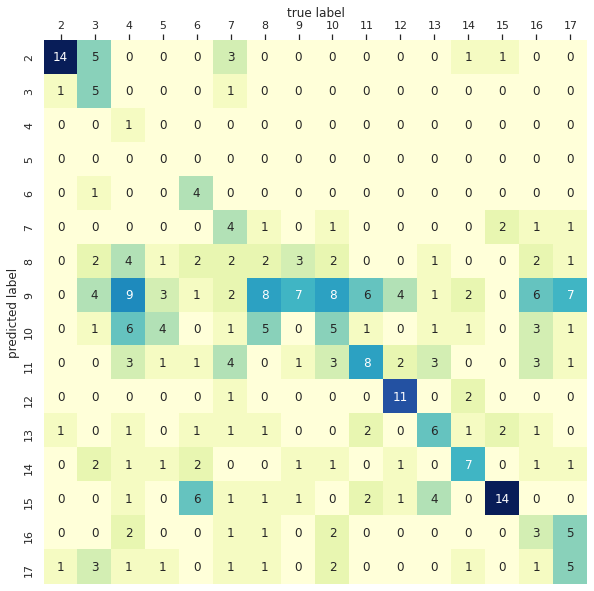

In [74]:
sns.set(style="white", color_codes=True)
plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

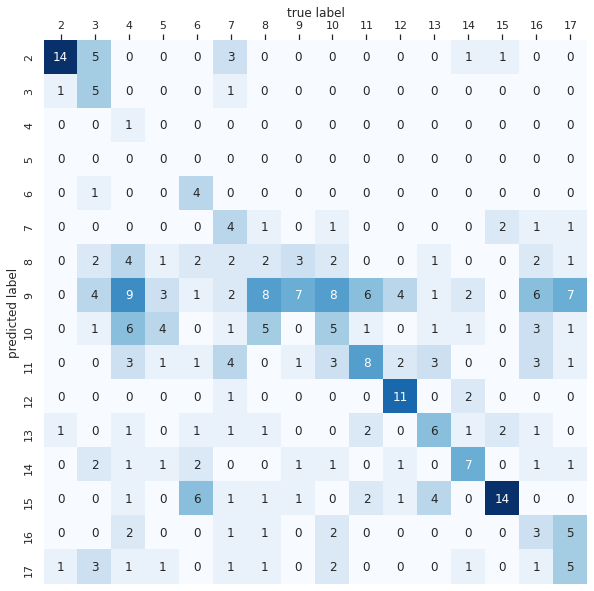

In [75]:
plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="Blues")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');